In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import gym
import pickle
from dqn import Options,DQN,DuelingDQN,DoubleDQN,Hyperparams,EnvInfo
from gridEnvironment import GridEnvironment


device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

## DQN Grid Environment

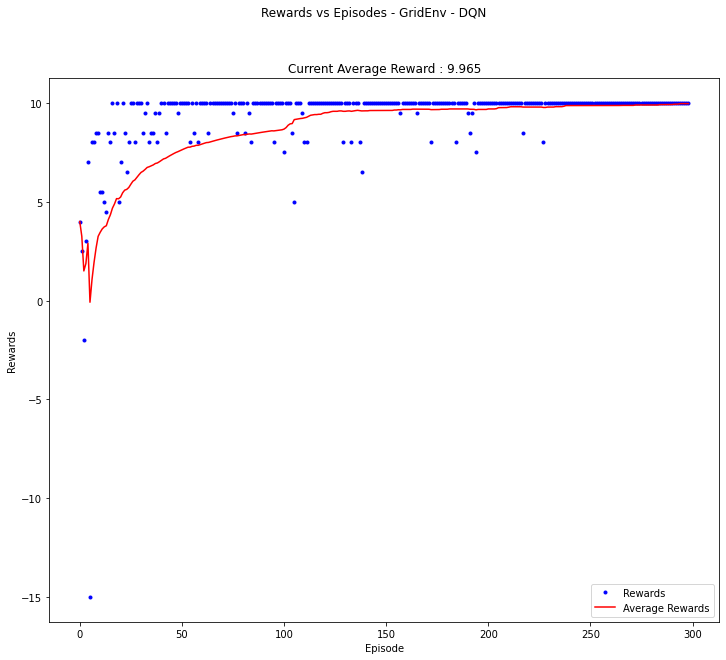

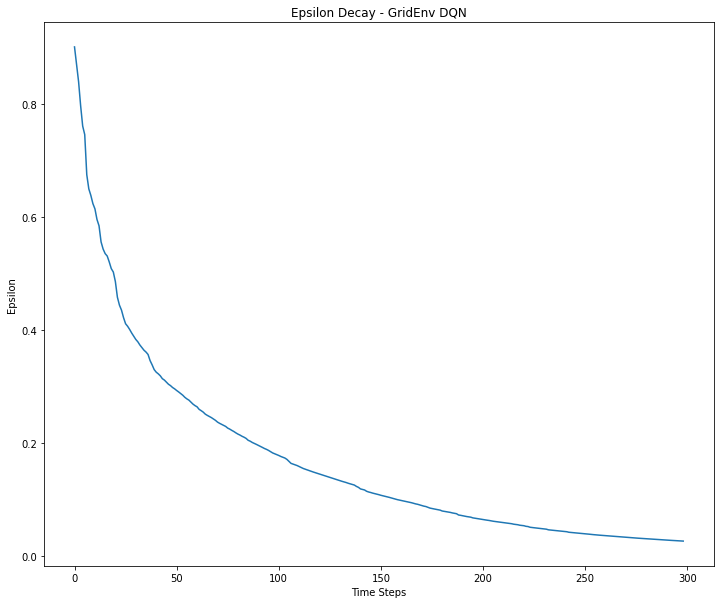

In [4]:
class NeuralNetworkForGridEnv(nn.Module):
    def __init__(self, observation_space, action_space, learningRate):
        super().__init__()
        self.layer_1 = nn.Linear(observation_space, 256)
        self.layer_2 = nn.Linear(256, 256)
        self.layer_3 = nn.Linear(256, action_space)
        self.optimizer = optim.Adam(self.parameters(), lr=learningRate)
        self.loss = nn.MSELoss()
        self.to(device)

    def forward(self, x):
        x = F.relu(self.layer_1(x))
        x = F.relu(self.layer_2(x))
        return self.layer_3(x)

gridEnv = GridEnvironment(env="Deterministic", max_timesteps=100)
    
dqnGridEnv = DQN(
    envInfo=EnvInfo(
        env=gridEnv,
        observation_space = gridEnv.observation_space.n,
        action_space = gridEnv.action_space.n
    ),
    hyperparams=Hyperparams(
        epsilon=0.9,
        epsilonMin=0.001,
        epsilonDecay=1000,
        memorySize=1000,
        learningRate=1e-4,
        batchSize=128,
        discountFactor=0.99,
        targetNetworkUpdateFrequency=100,
        episodes=300
    ),
    nnModel=NeuralNetworkForGridEnv,
    options = Options(
        resultsPath='./results',
        filePrefix='GridEnv',
        showLiveResults=True,
        logResults = False,
        saveModels = True,
        debug = False
    )
)

dqnGridEnv.train()


## Saving DQN Grid Environment

In [7]:
dqnGridEnv.saveWeights()
dqnGridEnv.saveModels()
dqnGridEnv.saveResults()

<Figure size 864x720 with 0 Axes>

## Load Grid Environment

--------------------------------------------------------------------------------

Episode 0                         
Current Reward 10 
--------------------------------------------------------------------------------

Episode 1                         
Current Reward 10 
--------------------------------------------------------------------------------

Episode 2                         
Current Reward 10 
--------------------------------------------------------------------------------

Episode 3                         
Current Reward 10 
--------------------------------------------------------------------------------

Episode 4                         
Current Reward 10 
--------------------------------------------------------------------------------

Episode 5                         
Current Reward 10 
--------------------------------------------------------------------------------

Episode 6                         
Current Reward 10 
------------------------------------------------

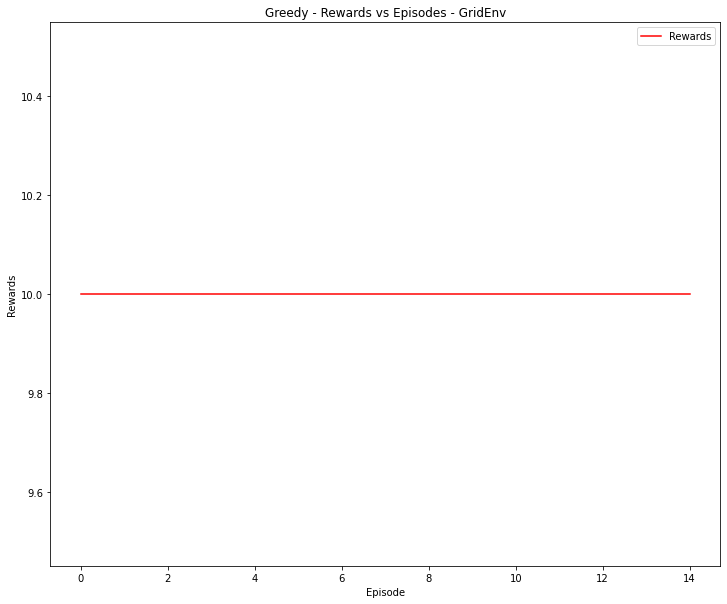

In [8]:
policyModel = torch.load('./results/models/GridEnv_DQN_policy_model.pth')
targetModel = torch.load('./results/models/GridEnv_DQN_target_model.pth')

dqnGridEnv.loadModels(policyModel,targetModel)

dqnGridEnv.greedy(timeSteps = 15)

## DQN - Cartpole

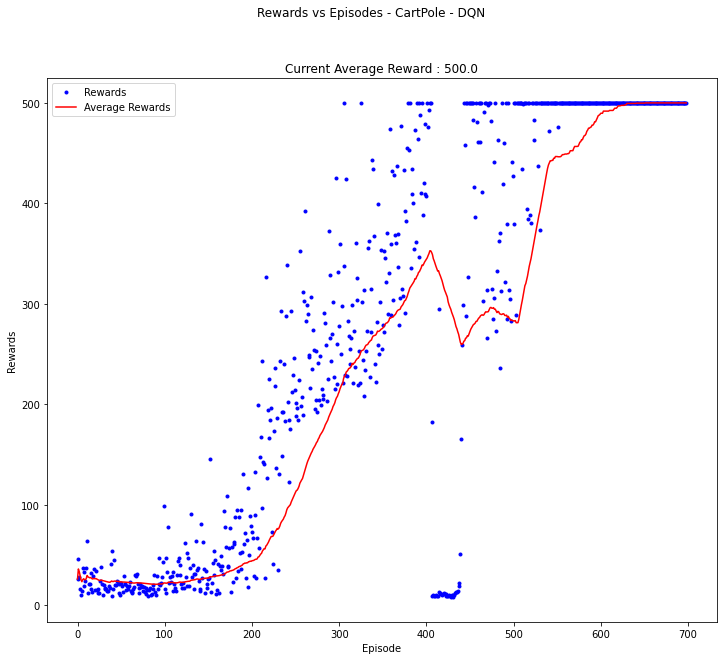

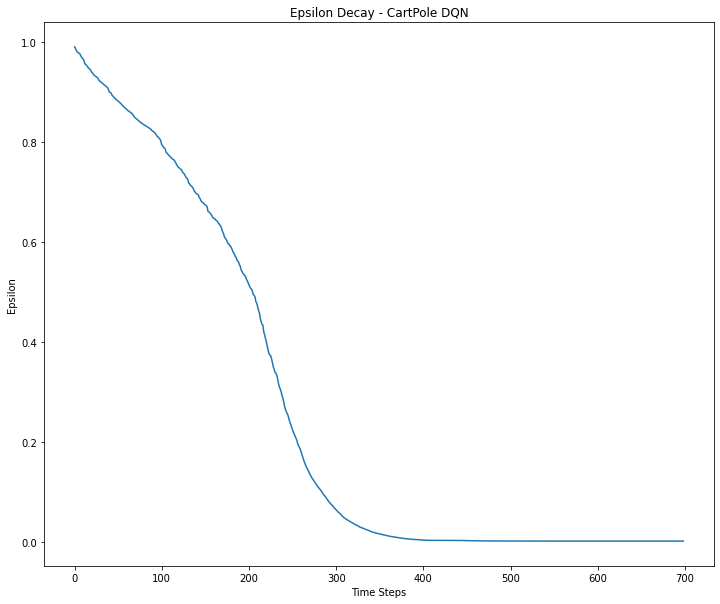

In [7]:
class NeuralNetworkForCartPole(nn.Module):
    def __init__(self, observation_space, action_space, learningRate):
        super().__init__()
        self.layer_1 = nn.Linear(observation_space, 128)
        self.layer_2 = nn.Linear(128, 128)
        self.layer_3 = nn.Linear(128, action_space)
        self.optimizer = optim.Adam(self.parameters(), lr=learningRate)
        self.loss = nn.MSELoss()
        self.to(device)

    def forward(self, x):
        x = F.relu(self.layer_1(x))
        x = F.relu(self.layer_2(x))
        return self.layer_3(x)
    

CartPoleParameters = (
    EnvInfo(env=gym.make('CartPole-v1')),
    Hyperparams(
        epsilon=0.99,
        epsilonMin=0.001,
        epsilonDecay=10000,
        memorySize=10000,
        learningRate=1e-4,
        batchSize=128,
        discountFactor=0.99,
        targetNetworkUpdateFrequency=20,
        episodes=700
    ),
    NeuralNetworkForCartPole,
    Options(
        resultsPath='./results',
        filePrefix='CartPole',
        showLiveResults=True,
        logResults = False,
        saveModels = True,
        debug = False
    )
)


dqnCartPole = DQN(*CartPoleParameters)

# dqnCartPole.train()



## Saving Results of DQN Cartpole

In [9]:
# dqnCartPole.saveWeights()
# dqnCartPole.saveModels()
# dqnCartPole.saveResults()

# policyModel = torch.load('./results/models/CartPole_DQN_policy_model.pth')
# targetModel = torch.load('./results/models/CartPole_DQN_target_model.pth')

# dqnCartPole.loadModels(policyModel,targetModel)
# dqnCartPole.greedy(timeSteps=15)


<Figure size 864x720 with 0 Axes>

## Double DQN Cartpole

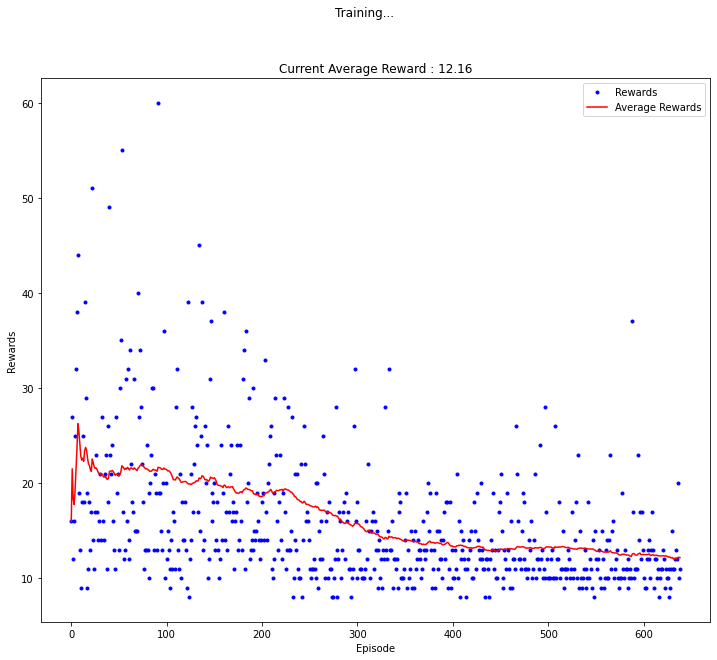

In [ ]:
doubledqnCartPole = DoubleDQN(*CartPoleParameters)
doubledqnCartPole.train()

## Saving Results of Double DQN Cartpole

In [9]:
# doubledqnCartPole.saveWeights()
# doubledqnCartPole.saveModels()
# doubledqnCartPole.saveResults()

# policyModel = torch.load('./results/models/CartPole_DoubleDQN_policy_model.pth')
# targetModel = torch.load('./results/models/CartPole_DoubleDQN_target_model.pth')

# doubledqnCartPole.loadModels(policyModel,targetModel)
# doubledqnCartPole.greedy(timeSteps=15)


<Figure size 864x720 with 0 Axes>

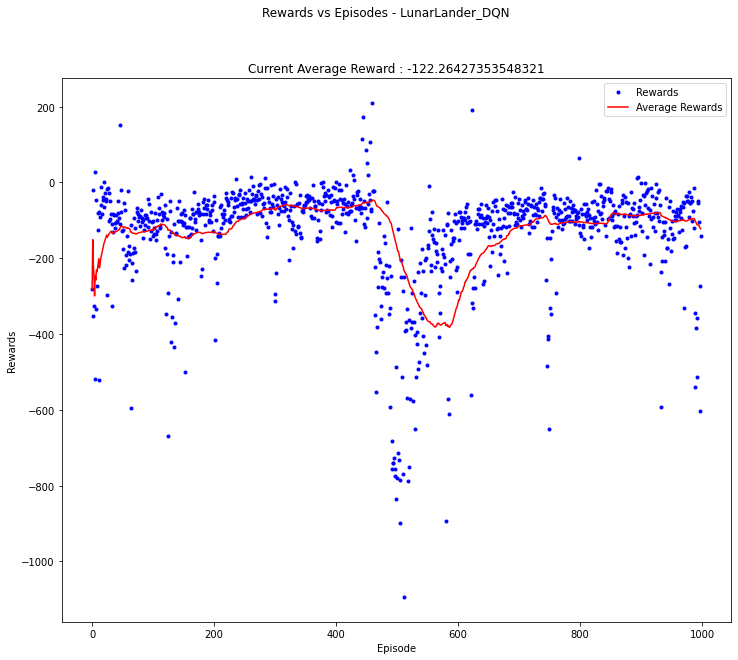

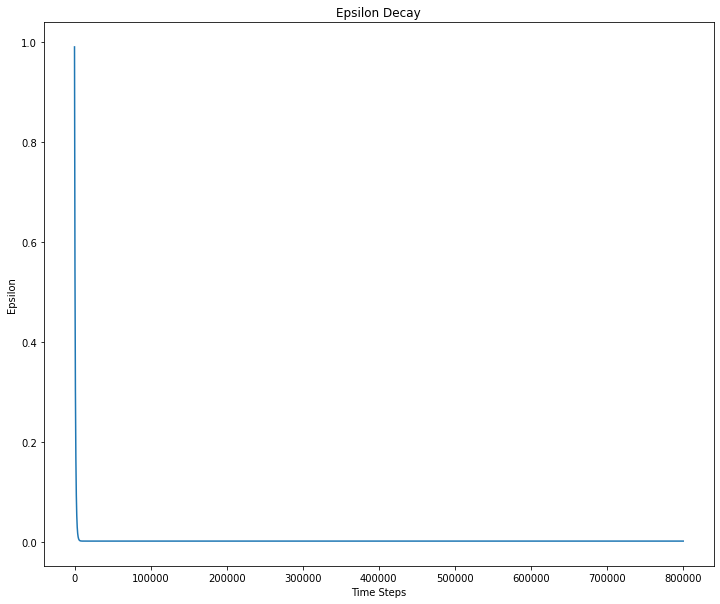

In [24]:
class NeuralNetworkForLunarLander(nn.Module):
    def __init__(self, observation_space, action_space, learningRate):
        super().__init__()
        self.layer_1 = nn.Linear(observation_space, 128)
        self.layer_2 = nn.Linear(128, 128)
        self.layer_3 = nn.Linear(128, action_space)
        self.optimizer = optim.Adam(self.parameters(), lr=learningRate)
        self.loss = nn.MSELoss()
        self.to(device)

    def forward(self, x):
        x = F.relu(self.layer_1(x))
        x = F.relu(self.layer_2(x))
        return self.layer_3(x)

dqnLunarLander = DQN(
    envInfo=EnvInfo(env=gym.make(
        "LunarLander-v2",
        continuous = False,
        gravity = -10.0,
        enable_wind = False,
        wind_power = 15.0,
        turbulence_power = 1.5
    )),
    hyperparams=Hyperparams(
        epsilon=0.99,
        epsilonMin=0.001,
        epsilonDecay=1000,
        memorySize=10000,
        learningRate=3e-4,
        batchSize=64,
        discountFactor=0.99,
        targetNetworkUpdateFrequency=300,
        episodes=1000
    ),
    nnModel=NeuralNetworkForLunarLander,
    options = Options(
        resultsPath='./results',
        filePrefix='LunarLander_DQN',
        showLiveResults=True,
        logResults = False,
        saveModels = True,
        debug = True
    )
)

dqnLunarLander.train()


## Saving the Model

In [22]:
# dqnLunarLander.saveModels()
# dqnLunarLander.saveWeights()
# dqnLunarLander.saveResults()

## Evaluate Lunar Lander Environment

Reward:0.4673531775071933, terminated=False,truncated=False
Reward:0.6460532295447774, terminated=False,truncated=False
Reward:0.8738164721561941, terminated=False,truncated=False
Reward:0.7363413449020311, terminated=False,truncated=False
Reward:0.6763597867000624, terminated=False,truncated=False
Reward:0.7987442867024026, terminated=False,truncated=False
Reward:1.121110710756626, terminated=False,truncated=False
Reward:1.1199203844471992, terminated=False,truncated=False
Reward:-0.36036965798919485, terminated=False,truncated=False
Reward:-0.8458734525929674, terminated=False,truncated=False
Reward:-1.14350825213853, terminated=False,truncated=False
Reward:-1.489634124061779, terminated=False,truncated=False
Reward:-1.4654970378342955, terminated=False,truncated=False
Reward:-1.7200764324755642, terminated=False,truncated=False
Reward:-2.2568450105811437, terminated=False,truncated=False
Reward:-2.4252823732871023, terminated=False,truncated=False
Reward:-2.6315948084658474, termina

Reward:-11.324416775912509, terminated=False,truncated=False
Reward:-11.307126294902018, terminated=False,truncated=False
Reward:-11.492851852236326, terminated=False,truncated=False
Reward:-11.6977843897196, terminated=False,truncated=False
Reward:-11.905833245865578, terminated=False,truncated=False
Reward:-12.236111170524195, terminated=False,truncated=False
Reward:-12.740856391278752, terminated=False,truncated=False
Reward:-13.414535223027569, terminated=False,truncated=False
Reward:-14.17770682446442, terminated=False,truncated=False
Reward:-15.312149728289368, terminated=False,truncated=False
Reward:-100, terminated=True,truncated=False
--------------------------------------------------------------------------------

Episode 7                         
Current Reward -539.0259837868659 
Reward:1.4109592062675926, terminated=False,truncated=False
Reward:1.9741586884053686, terminated=False,truncated=False
Reward:2.159052087500983, terminated=False,truncated=False
Reward:2.15404070

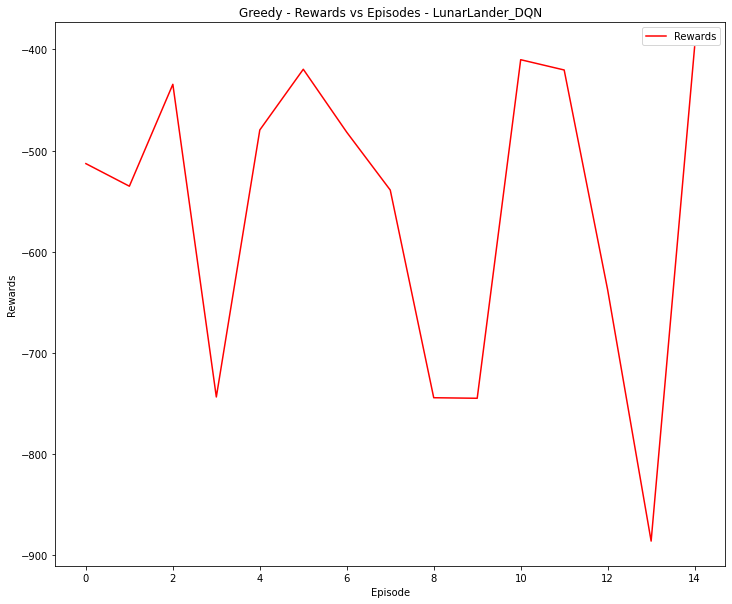

In [23]:
policyModel = torch.load('./results/models/LunarLander_DQN_policy_model.pth')
targetModel = torch.load('./results/models/LunarLander_DQN_target_model.pth')

dqnLunarLander.loadModels(policyModel,targetModel)

dqnLunarLander.greedy(timeSteps = 15)

In [15]:
class Sample:
    def __init__(self):
        print(dir(self))
        print(type(self).__name__)
s = Sample()

['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__']
Sample


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__']
